This notebook tried to implement the Hybrid-Opinion-Model by Jager et. al., but has the errors that the partner is not updated and that the time in the while loop was also called t (Same as the upper threshhold), which led to no repulsion from timestep 2 and onwards. This is not a reproduction of the model, but the opinion dynamics are ideal for showing the effects of clustering, since the clustering happens rather slowly here, which is why we continued to use the "false" dynamics. 
[Jager et al. (2004). Uniformity, Bipolarization and Pluriformity Captured as Generic Stylized Behavior with an Agent-Based Simulation Model of Attitude Change]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def Opinion_Dynamics(N, mu, u, t, runtime, filename, seed=42):
    # Create array to save the dynmaics
    saves = np.zeros((runtime, N))

    # Set seed
    np.random.seed(seed)

    # Create array representing agents opinions and assign them uniformly distributed
    # random opinions from -1 to 1
    agents = np.zeros(N)
    for i in range (N):
        agents[i] = np.random.uniform(-1.0, 1.0)

    # Create index array to later access agents in random order
    inds = np.arange(0, N, 1, dtype = int)

    # Start dynamics
    t = 0
    while t < runtime:
        # Determine random order in which agents are visited
        order = np.random.choice( inds, size=N, replace=False)
        # Create array that saves old opinions
        #agents = agents

        for a in order:
            # Pick random partner != a
            par = a
            while par == a:
                par = np.random.choice( inds, size=1)

            # Perform dynamics 
            if abs(agents[a] - agents[par]) <= u:
                agents[a] = agents[a] + mu * (agents[par] - agents[a])
            if abs(agents[a] - agents[par]) >= t:
                agents[a] = agents[a] - mu * (agents[par] - agents[a])
                
            # Truncate opinions to avoid them going beyond the opinion borders [-1,1]
            if agents[a] > 1:
                agents[a] = 1
            if agents[a] < -1:
                agents[a] = -1

        # Save new opinions
        saves[t] = agents

        t += 1
    
    # Export saves to csv
    pd.DataFrame(saves).to_csv(f"D:\Daten mit Änderungen\Physik\Epidemics_Infodemics_Mobility\Data_repl\{filename}.csv")

    return saves


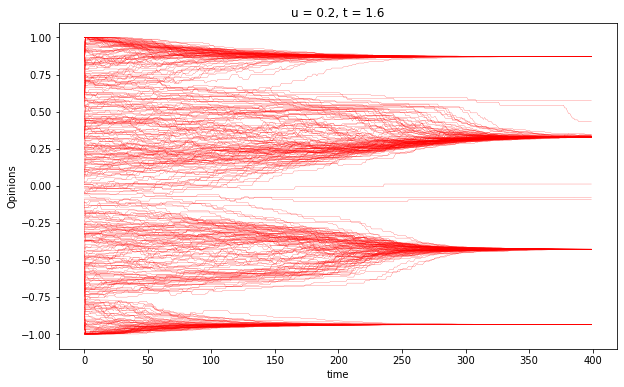

In [6]:
# Set parameters
N = 400
mu = 0.1
u = 0.2
t = 1.6
runtime = 400

# Perform simulation
data = Opinion_Dynamics(N, mu, u, t, runtime, "HB_u0.2_t1.6", seed=42)

# Example plot of latest dataset.
time = np.arange(0, runtime)

plt.figure(figsize=(10,6))
plt.xlabel("time")
plt.ylabel("Opinions")
for i in range (N):
    plt.plot(time, data[:,i], color='r', linewidth = '0.2')
plt.title(f"u = 0.2, t = 1.6")
plt.ylim(-1.1,1.1)
plt.savefig("D:\Daten mit Änderungen\Physik\Epidemics_Infodemics_Mobility\HB_u0.2_t1.6.png")